In [1]:
# 171805012 Refiye Şehnaz Yıldırım
# 171805043 Ersu Karpuz

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from nltk.corpus import stopwords

In [3]:
#Upload Data
data = pd.read_excel("NLP1_train_tweets.xlsx",header=None)

data.columns = ['Sentence','Class']
data

,Sentence,Class
0,Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkc...,olumsuz
1,20 dk 1 GB internet 500 mb sadece kaşar turkce...,olumsuz
2,Ayrıca turkcell superonline reklamı kadar da k...,olumsuz
3,Turkcell çok pahalı ya,olumsuz
4,Turkcell Kaş'ta internetin cekmiyor,olumsuz
...,...,...
13827,@Buragl111 turkcell kazık takıl sen bimcell le...,olumsuz
13828,@Turkcell merhaba turkcell.20 senelik dostlugu...,olumlu
13829,@TurkcellHizmet merhaba. Numarami bir baska op...,olumsuz
13830,iyi de Herkes TURKCELL Abonesi Değil ki ??,olumlu


In [4]:
data.head()

,Sentence,Class
0,Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkc...,olumsuz
1,20 dk 1 GB internet 500 mb sadece kaşar turkce...,olumsuz
2,Ayrıca turkcell superonline reklamı kadar da k...,olumsuz
3,Turkcell çok pahalı ya,olumsuz
4,Turkcell Kaş'ta internetin cekmiyor,olumsuz


In [5]:
data.isnull().sum()

Sentence    0
Class       0
dtype: int64

In [6]:
# data preprocessing

In [7]:
data['Sentence'] = data['Sentence'].str.strip().str.lower()

data["Class"].unique()

#remove email adress
data['Sentence'] = data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)

#remove IP address
data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)

#remove punctaitions and special chracters
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')

#remove numbers
data['Sentence'] = data['Sentence'].replace('\d', '', regex=True)

C:\Users\Ersu\AppData\Local\Temp/ipykernel_1572/2334610009.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')


In [8]:
data.head()

,Sentence,Class
0,ulan wifiye bağlıyım ben ona bağlıyken turkcel...,olumsuz
1,dk gb internet mb sadece kaşar turkcell de ...,olumsuz
2,ayrıca turkcell superonline reklamı kadar da k...,olumsuz
3,turkcell çok pahalı ya,olumsuz
4,turkcell kaşta internetin cekmiyor,olumsuz


In [9]:
for i, cell in enumerate(data["Class"]):
    if cell == "olumsuz":
        value = 0
    elif cell == "olumlu":
        value = 1
    else:
        value = 2
    data["Class"].loc[i] = value

In [10]:
data.head()

,Sentence,Class
0,ulan wifiye bağlıyım ben ona bağlıyken turkcel...,0
1,dk gb internet mb sadece kaşar turkcell de ...,0
2,ayrıca turkcell superonline reklamı kadar da k...,0
3,turkcell çok pahalı ya,0
4,turkcell kaşta internetin cekmiyor,0


In [11]:
# tokenizing

In [12]:
x = data['Sentence']
y = data['Class']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ersu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
vec = CountVectorizer(stop_words=stopwords.words('turkish'))

x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x.astype('int'), y.astype('int'))

GaussianNB()

In [16]:
pred = model.predict(x_test)

In [17]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(pred)):
    if pred[i] == 1 and y_test.values[i] == 1:
        tp += 1
    elif pred[i] == 0 and y_test.values[i] == 1:
        fp += 1
    elif pred[i] == 0 and y_test.values[i] == 0:
        tn += 1
    elif pred[i] == 1 and y_test.values[i] == 0:
        fn += 1

accuracy = (tp + tn)/(tp + fp + tn + fn)
print("accuracy =",accuracy*100)    

recall = (tp)/(tp+fn)
print("recall =",recall*100)

precision = tp/(tp+fp)
print("precision =",precision*100)

f1 = 2*(precision * recall)/(precision + recall)
print("f1 =",f1 *100)


accuracy = 63.7941006362059
recall = 79.11392405063292
precision = 54.08653846153846
f1 = 64.24900057110221


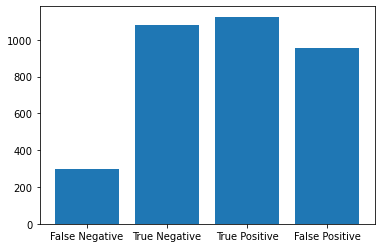

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[fn,tn,tp,fp])
plt.show()

In [19]:
data = {'Sentence' : pred , 'Class': y_test}
df = pd.DataFrame(data, columns=['Sentence','Class'])
confusion_matrix = pd.crosstab(df['Sentence'], df['Class'], rownames=['pred'], colnames=['y_test'])
print (confusion_matrix)

y_test     0     1
pred              
0       1081   955
1        297  1125


In [20]:
sentence = "bu durumu hiç sevmedim"
result = model.predict(vec.transform([sentence]).toarray())
classes = {
    "0": "olumsuz",
    "1": "olumlu",
}
print(sentence + ": " + classes[str(result[0])])

bu durumu hiç sevmedim: olumsuz
